In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("cleaned_data.csv")

In [44]:
df.head(1)

,Gender,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),...,12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,Female,8.6,ICSE,83,89,86,91.8,Private School,ICSE,98.0,...,90,96.0,94.9,87.8,57.4,84.5,91.9,86.1,82.6,88.3


Outcome:
<br> 
Female is denoted with 0 <br>
Male with 1

In [47]:
df.describe()

,Gender,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.791139,7.027848,87.012658,89.854430,86.215190,89.252278,80.318776,74.489451,79.757384,81.664557,80.625633,63.964557,80.843671,77.808228,81.793481,65.419620,80.373418,77.410759,81.519620
std,0.407787,0.992512,8.297791,7.289139,7.542104,5.019557,10.114927,14.000590,11.698842,8.565678,7.909647,21.462683,13.502071,17.341600,11.115008,23.036721,17.205789,19.493444,13.980302
min,0.000000,0.200000,60.000000,64.000000,59.000000,72.800000,53.000000,38.000000,50.000000,48.000000,53.400000,4.100000,22.300000,16.600000,17.700000,1.100000,6.200000,7.100000,5.200000
25%,1.000000,6.500000,81.000000,87.000000,82.000000,85.800000,73.000000,63.000000,71.250000,77.000000,75.800000,47.900000,74.400000,71.500000,76.350000,47.475000,76.750000,69.025000,77.925000
50%,1.000000,7.100000,90.500000,91.500000,87.000000,90.000000,81.000000,75.000000,81.000000,82.500000,80.400000,68.300000,83.750000,82.500000,84.650000,72.550000,86.100000,84.600000,85.350000
75%,1.000000,7.700000,93.000000,95.000000,91.750000,92.800000,88.000000,86.000000,88.000000,88.750000,86.200000,82.650000,90.875000,90.500000,89.400000,85.200000,90.800000,91.100000,90.000000
max,1.000000,8.600000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,97.400000,96.300000,97.800000,98.100000,97.700000,96.300000,97.000000,98.700000,97.600000


In [48]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['CGPA'].sort_values(ascending=False)
display(correlations)

CGPA                                              1.000000
12th Class Overall Percentage                     0.344567
10th Class Overall Percentage                     0.314858
12th Class Maths Marks (out of 100)               0.309010
10th Class English/Language Marks (out of 100)    0.261778
12th Class Physics Marks (out of 100)             0.254530
10th Class Maths Marks (out of 100)               0.216882
12th Class English/Language Marks (out of 100)    0.215529
12th Class Chemistry Marks (out of 100)           0.204429
JEE Mains Session 1 Maths Percentile              0.184339
10th Class Science Marks (out of 100)             0.184025
JEE Mains Session 2 Overall  Percentile           0.171737
JEE Mains Session 2 Physics  Percentile           0.167137
JEE Mains Session 2 Chemistry  Percentile         0.100470
JEE Mains Session 2 Maths  Percentile             0.095689
JEE Mains Session 1 Overall Score                 0.091371
JEE Mains Session 1 Physics  Percentile           0.0555

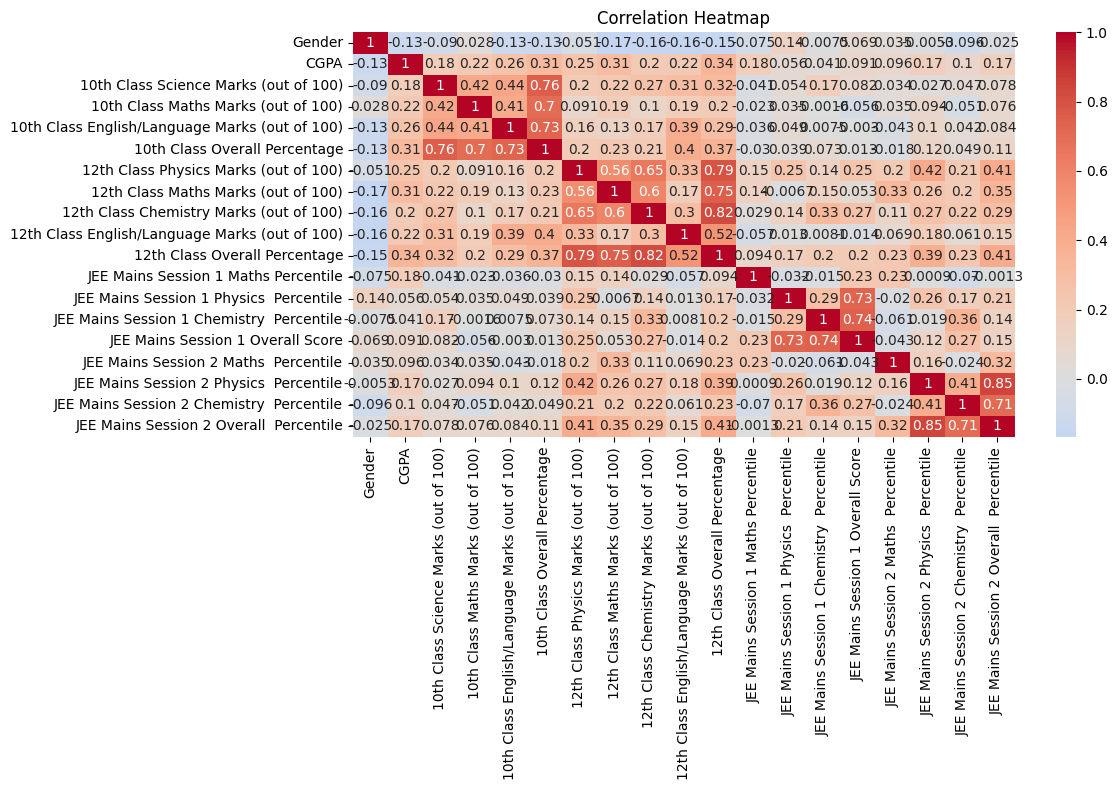

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### OutComes
1. There is very less correlation with  CGPA and other features.
<br>
There, we need to find another way to have a concreate or appropriate way to have better correlation.

In [50]:
df['10th_avg'] = df[['10th Class Science Marks (out of 100)', 
                        '10th Class Maths Marks (out of 100)', 
                        '10th Class English/Language Marks (out of 100)']].mean(axis=1)

df['12th_avg'] = df[['12th Class Physics Marks (out of 100)',
                        '12th Class Maths Marks (out of 100)',
                        '12th Class Chemistry Marks (out of 100)',
                        '12th Class English/Language Marks (out of 100)']].mean(axis=1)

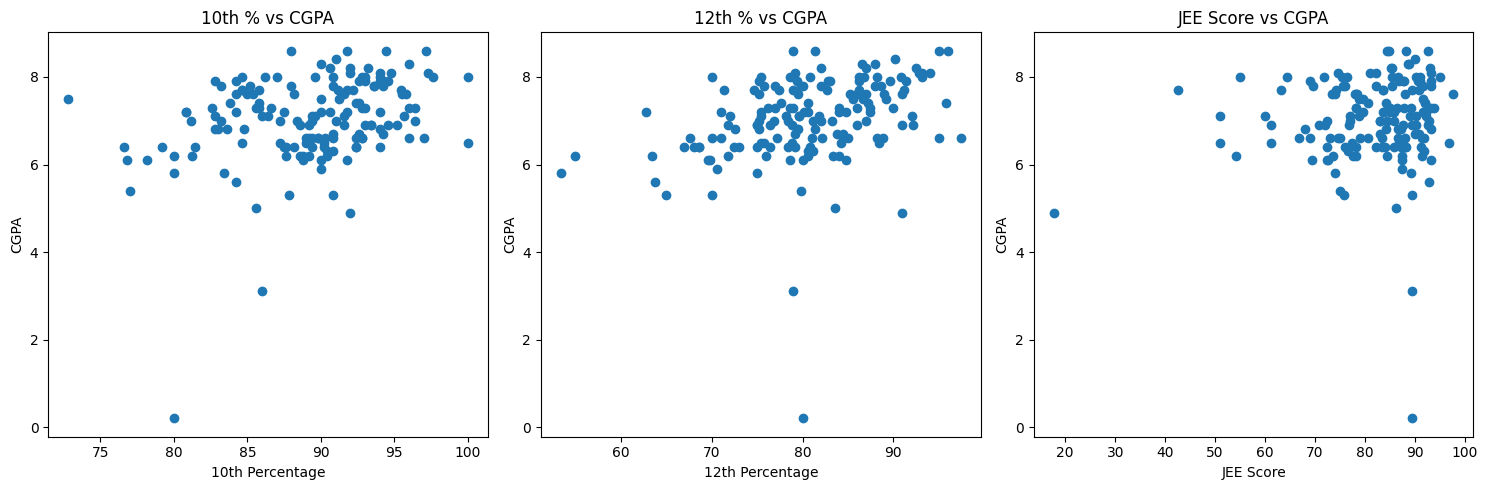

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['10th Class Overall Percentage'], df['CGPA'])
plt.title('10th % vs CGPA')
plt.xlabel('10th Percentage')
plt.ylabel('CGPA')


plt.subplot(132)
plt.scatter(df['12th Class Overall Percentage'], df['CGPA'])
plt.title('12th % vs CGPA')
plt.xlabel('12th Percentage')
plt.ylabel('CGPA')

plt.subplot(133)
plt.scatter(df['JEE Mains Session 1 Overall Score'], df['CGPA'])
plt.title('JEE Score vs CGPA')
plt.xlabel('JEE Score')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

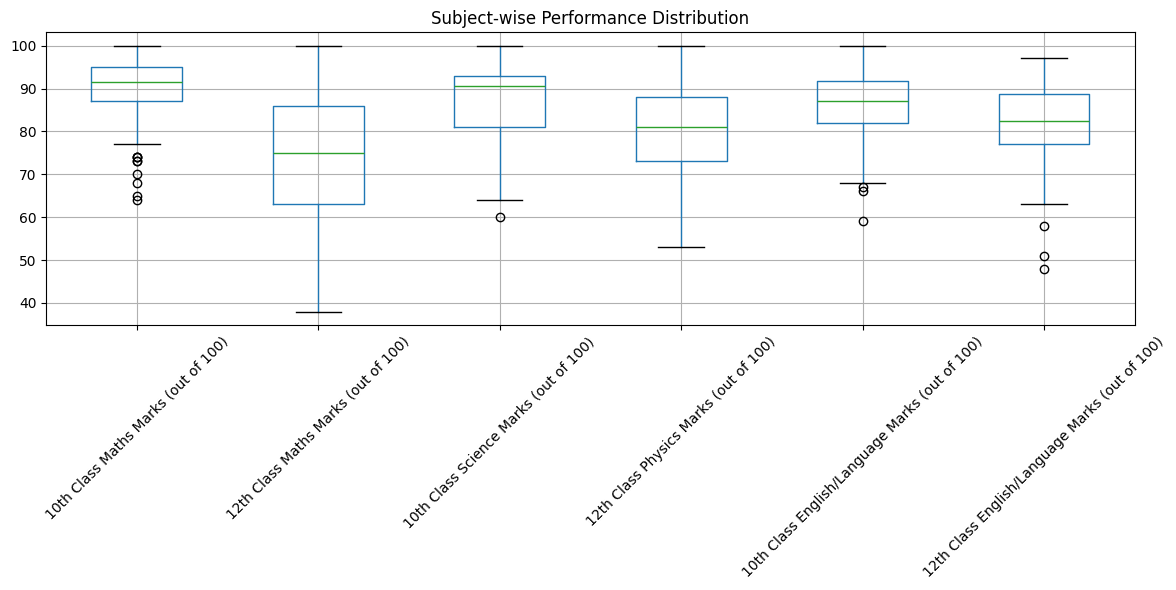

In [52]:
# Subject-wise analysis
subjects = {
    'Mathematics': ['10th Class Maths Marks (out of 100)', '12th Class Maths Marks (out of 100)'],
    'Science/Physics': ['10th Class Science Marks (out of 100)', '12th Class Physics Marks (out of 100)'],
    'English': ['10th Class English/Language Marks (out of 100)', '12th Class English/Language Marks (out of 100)']
}


# for subject, columns in subjects.items():
#     improvement = df[columns[1]] - df[columns[0]]
#     print(f"{subject} Performance Change (12th - 10th):")
#     display(improvement.describe())

# Box plots 
plt.figure(figsize=(12, 6))
df.boxplot([col for cols in subjects.values() for col in cols])
plt.xticks(rotation=45)
plt.title('Subject-wise Performance Distribution')
plt.tight_layout()
plt.show()


## Gender Based distribution

In [54]:
df["Gender"] = df["Gender"].replace({'Male': 1,'Female':0})

In [55]:
print("Gender Distribution:")
display(df['Gender'].value_counts())

Gender Distribution:


Gender
1    125
0     33
Name: count, dtype: int64

In [56]:
print("Average CGPA by Gender:")
display(df.groupby('Gender')['CGPA'].mean())

Average CGPA by Gender:


Gender
0    7.269697
1    6.964000
Name: CGPA, dtype: float64

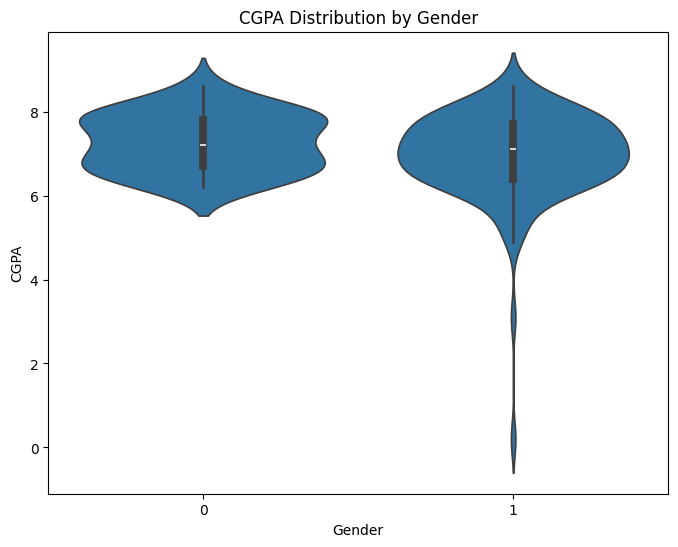

In [57]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='CGPA', data=df)
plt.title('CGPA Distribution by Gender')
plt.show()

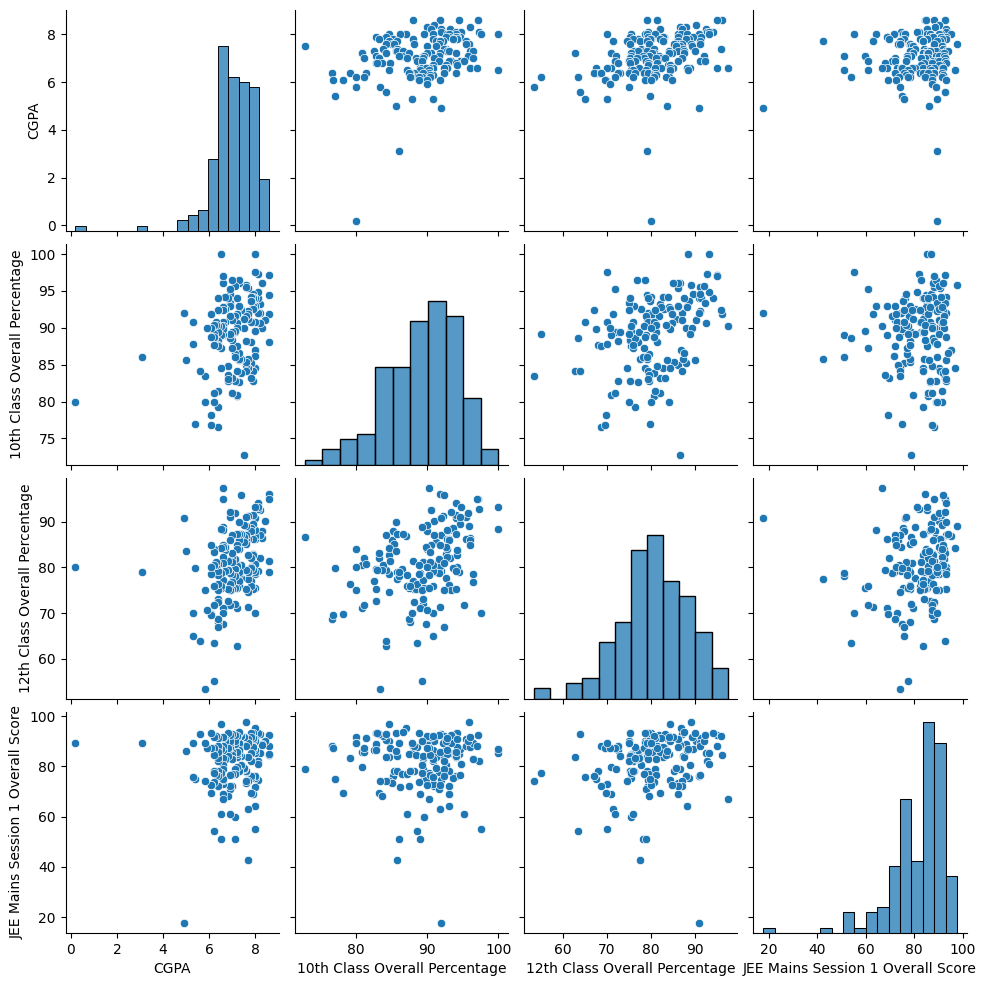

In [58]:
key_vars = ['CGPA', '10th Class Overall Percentage', '12th Class Overall Percentage', 
           'JEE Mains Session 1 Overall Score']
sns.pairplot(df[key_vars])
plt.show()

# Day 2

In [60]:
df

,Gender,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),...,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile,10th_avg,12th_avg
0,0,8.6,ICSE,83,89,86,91.80,Private School,ICSE,98.000000,...,94.9,87.8,57.4,84.5,91.9,86.1,82.6,88.3,86.000000,94.750000
1,1,8.6,State Board,93,79,76,88.00,Government School,Others,82.000000,...,95.3,58.3,95.7,88.2,89.9,72.6,90.6,84.7,82.666667,79.750000
2,1,8.6,CBSE,95,99,84,94.40,Private School,CBSE,75.000000,...,73.3,87.8,78.3,84.8,82.9,93.6,83.2,90.4,92.666667,78.250000
3,1,8.6,CBSE,98,99,99,97.16,Private School,CBSE,94.000000,...,71.7,93.9,88.9,92.6,78.1,93.8,86.0,90.6,98.666667,94.000000
4,1,8.4,CBSE,80,95,91,91.00,Government School,CBSE,95.000000,...,96.3,91.8,72.7,90.1,91.5,86.5,88.6,89.9,88.666667,90.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,5.3,CBSE,78,97,94,90.80,Private School,State Board,64.000000,...,45.9,81.2,73.3,75.8,77.3,44.0,23.7,41.7,89.666667,61.000000
154,1,5.0,CBSE,81,82,80,85.60,Government School,CBSE,83.000000,...,72.9,87.3,80.4,86.3,78.2,81.5,59.5,77.2,81.000000,82.250000
155,1,4.9,State Board,100,100,90,92.00,Private School,State Board,91.666667,...,46.5,22.3,19.6,17.7,96.3,82.6,47.4,85.3,96.666667,91.166667
156,1,3.1,CBSE,91,92,70,86.00,Private School,State Board,81.000000,...,59.9,94.5,80.8,89.5,85.2,97.0,84.7,92.9,84.333333,78.250000


In [62]:
df =  df.drop(["10th Class Board","12th Class School Category","12th Class Board"], axis =1)

In [63]:
df

,Gender,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),...,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile,10th_avg,12th_avg
0,0,8.6,83,89,86,91.80,98.000000,98.000000,93.000000,90,...,94.9,87.8,57.4,84.5,91.9,86.1,82.6,88.3,86.000000,94.750000
1,1,8.6,93,79,76,88.00,82.000000,81.000000,78.000000,78,...,95.3,58.3,95.7,88.2,89.9,72.6,90.6,84.7,82.666667,79.750000
2,1,8.6,95,99,84,94.40,75.000000,86.000000,72.000000,80,...,73.3,87.8,78.3,84.8,82.9,93.6,83.2,90.4,92.666667,78.250000
3,1,8.6,98,99,99,97.16,94.000000,95.000000,96.000000,91,...,71.7,93.9,88.9,92.6,78.1,93.8,86.0,90.6,98.666667,94.000000
4,1,8.4,80,95,91,91.00,95.000000,92.000000,83.000000,92,...,96.3,91.8,72.7,90.1,91.5,86.5,88.6,89.9,88.666667,90.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,5.3,78,97,94,90.80,64.000000,38.000000,59.000000,83,...,45.9,81.2,73.3,75.8,77.3,44.0,23.7,41.7,89.666667,61.000000
154,1,5.0,81,82,80,85.60,83.000000,79.000000,90.000000,77,...,72.9,87.3,80.4,86.3,78.2,81.5,59.5,77.2,81.000000,82.250000
155,1,4.9,100,100,90,92.00,91.666667,94.333333,96.666667,82,...,46.5,22.3,19.6,17.7,96.3,82.6,47.4,85.3,96.666667,91.166667
156,1,3.1,91,92,70,86.00,81.000000,68.000000,82.000000,82,...,59.9,94.5,80.8,89.5,85.2,97.0,84.7,92.9,84.333333,78.250000


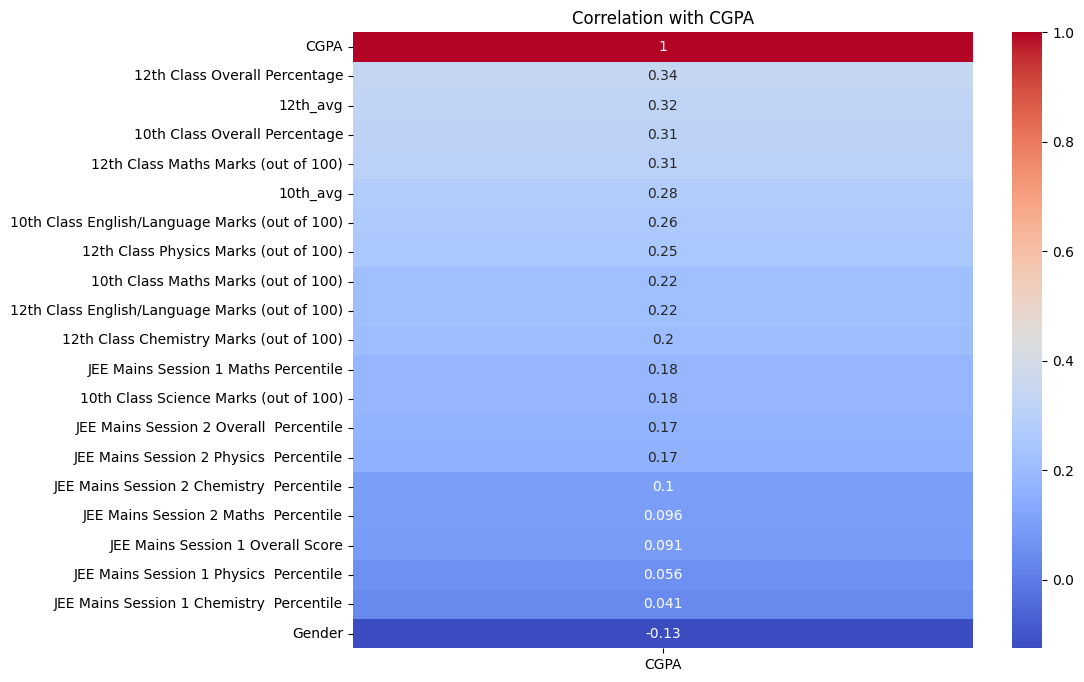

Features with correlation above threshold: ['CGPA', '10th Class Maths Marks (out of 100)', '10th Class English/Language Marks (out of 100)', '10th Class Overall Percentage', '12th Class Physics Marks (out of 100)', '12th Class Maths Marks (out of 100)', '12th Class Chemistry Marks (out of 100)', '12th Class English/Language Marks (out of 100)', '12th Class Overall Percentage', '10th_avg', '12th_avg']


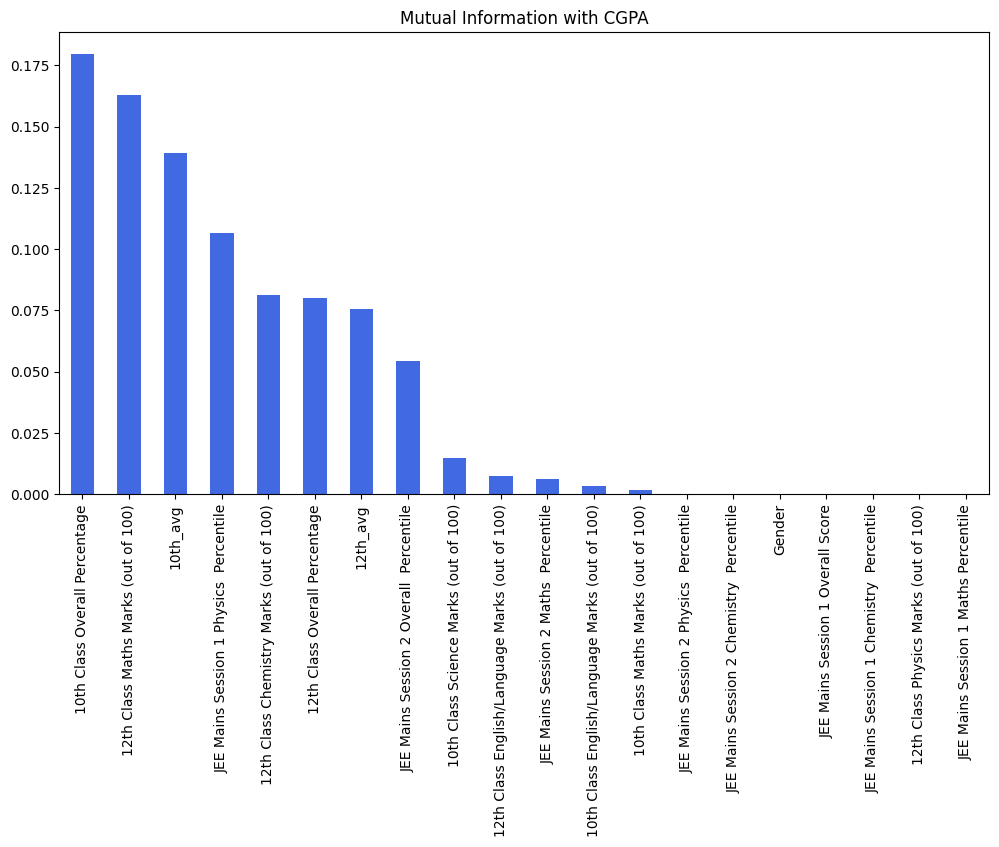

Top features by mutual information: 10th Class Overall Percentage              0.179588
12th Class Maths Marks (out of 100)        0.162855
10th_avg                                   0.139441
JEE Mains Session 1 Physics  Percentile    0.106503
12th Class Chemistry Marks (out of 100)    0.081360
dtype: float64


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlations with CGPA
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['CGPA']].sort_values(by='CGPA', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with CGPA")
plt.show()

# Select features with high correlation (threshold > 0.2 for example)
high_corr_features = corr_matrix['CGPA'][corr_matrix['CGPA'].abs() > 0.2].index.tolist()

print("Features with correlation above threshold:", high_corr_features)

# Using Mutual Information for better feature detection
X = df.drop(columns=['CGPA'])  # Features
y = df['CGPA']  # Target

# Compute mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plot mutual information
mutual_info_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='royalblue')
plt.title('Mutual Information with CGPA')
plt.show()

print("Top features by mutual information:", mutual_info_series.nlargest(5))
